In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('18F18saba.csv')

In [3]:
data = data.dropna()

In [4]:
print(data.shape)
print(list(data.columns))

(15, 14)
['Rank', 'Condition', 'id', 'disease', 'type of disease', 'type of animal', 'risk rate', 'symptoms', 'no.of symptoms', 'pathogens', 'prevention', 'treatment', 'appropriate medicines', 'no.of medicines']


In [5]:
data['disease'].unique()

array(['Avian Influenza', 'Lumpy skin ', 'Newcastle', 'Infectious Coryza',
       'Necrotic enteritis', 'Ascarids', 'Anthrax disease ',
       'Black Quarter', 'Foot and Mouth Disease', 'Mastitis in cows',
       'Thrush', 'Avian Pox', 'Equine encephalomyelitis ',
       'Hemorrhagic septicemia ', 'Lameness in Cattle'], dtype=object)

In [6]:
data['disease']=np.where(data['disease'] =='Avian Influenza', 'Avian', data['disease'])
data['disease']=np.where(data['disease'] =='Avian Pox', 'Avian', data['disease'])

In [7]:
data['disease'].unique()

array(['Avian', 'Lumpy skin ', 'Newcastle', 'Infectious Coryza',
       'Necrotic enteritis', 'Ascarids', 'Anthrax disease ',
       'Black Quarter', 'Foot and Mouth Disease', 'Mastitis in cows',
       'Thrush', 'Equine encephalomyelitis ', 'Hemorrhagic septicemia ',
       'Lameness in Cattle'], dtype=object)

In [8]:
data['disease'].value_counts()

Avian                        2
Lumpy skin                   1
Newcastle                    1
Infectious Coryza            1
Necrotic enteritis           1
Ascarids                     1
Anthrax disease              1
Black Quarter                1
Foot and Mouth Disease       1
Mastitis in cows             1
Thrush                       1
Equine encephalomyelitis     1
Hemorrhagic septicemia       1
Lameness in Cattle           1
Name: disease, dtype: int64

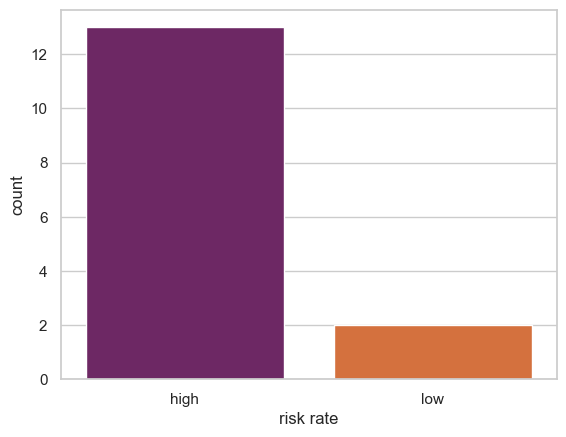

<Figure size 640x480 with 0 Axes>

In [9]:
sns.countplot(x='risk rate' ,data=data, palette='inferno')
plt.show()
plt.savefig('count_plot')

In [10]:
count_no_sub = len(data[data['disease']==0])

In [11]:
count_sub = len(data[data['type of animal']==1])

In [12]:
pct_of_no_sub = count_no_sub+(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub+(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 0
percentage of subscription 0


In [13]:
data.groupby('disease').mean()

,Rank,no.of symptoms,no.of medicines
disease,,,
Anthrax disease,11.0,5.0,4.0
Ascarids,10.0,3.0,3.0
Avian,9.0,8.5,3.0
Black Quarter,12.0,11.0,3.0
Equine encephalomyelitis,18.0,7.0,3.0
Foot and Mouth Disease,13.0,2.0,4.0
Hemorrhagic septicemia,19.0,6.0,5.0
Infectious Coryza,8.0,3.0,1.0
Lameness in Cattle,21.0,6.0,3.0


In [14]:
data.groupby('type of disease').mean()

,Rank,no.of symptoms,no.of medicines
type of disease,,,
bacterial disease,11.8,5.4,3.0
Genetic,13.0,2.0,4.0
Parasitic diseases,15.5,4.5,3.0
fungal disease,16.0,4.0,2.0
microorganisms disease,14.0,2.0,2.0
viral diseases,9.4,7.6,2.6


In [15]:
data.groupby('type of animal').mean()

,Rank,no.of symptoms,no.of medicines
type of animal,,,
livestock,14.000000,5.625000,3.250000
poultry,9.714286,5.285714,2.285714


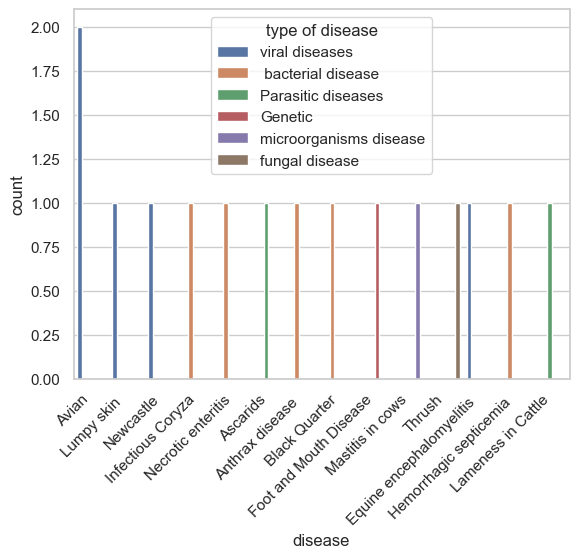

In [16]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data,x='disease',hue='type of disease')
plt.xticks(rotation=45, ha='right');

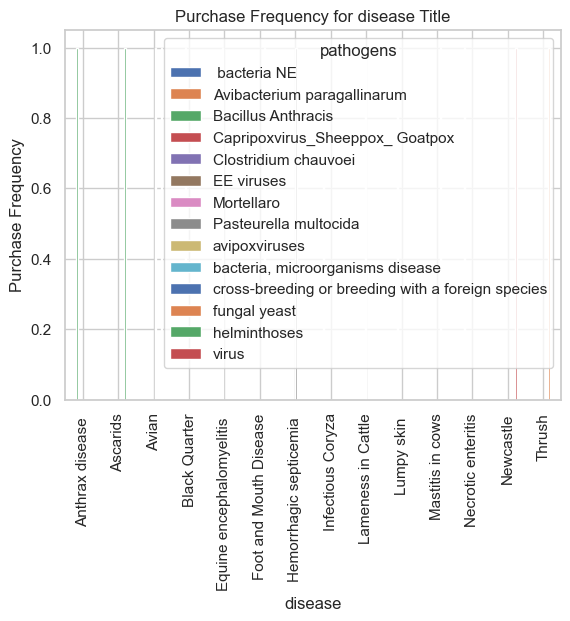

In [17]:
pd.crosstab(data.disease,data.pathogens).plot(kind='bar')
plt.title('Purchase Frequency for disease Title')
plt.xlabel('disease')
plt.ylabel('Purchase Frequency')
plt.savefig('disease')

In [18]:
# input
x = data.iloc[:, [0, 8]].values
  
# output
y = data.iloc[:, 3].values

In [19]:
from sklearn.model_selection import train_test_split
  
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.25, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
  
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
  
print (xtrain[0:10, :])

[[ 1.44086508 -0.032721  ]
 [-0.60423374 -1.47244498]
 [-0.94508355  0.68714099]
 [ 1.10001528 -0.032721  ]
 [ 0.58874057 -0.75258299]
 [-0.09295904  1.76693398]
 [ 0.75916547  1.40700298]
 [-0.77465864 -1.11251398]
 [-1.96763296  0.32721   ]
 [-0.43380884 -1.11251398]]


In [21]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [22]:
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [26]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)


f1 = f1_score(y_pred, y_test, average="weighted")

print("F1 Score:", f1)

F1 Score: 1.0


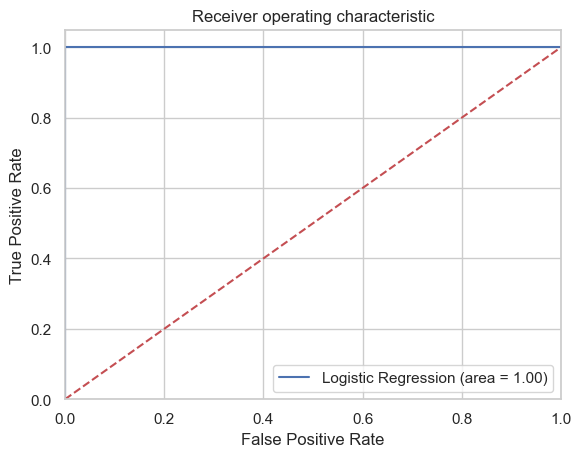

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [28]:
data.isnull().sum()

Rank                     0
Condition                0
id                       0
disease                  0
type of disease          0
type of animal           0
risk rate                0
symptoms                 0
no.of symptoms           0
pathogens                0
prevention               0
treatment                0
appropriate medicines    0
no.of medicines          0
dtype: int64

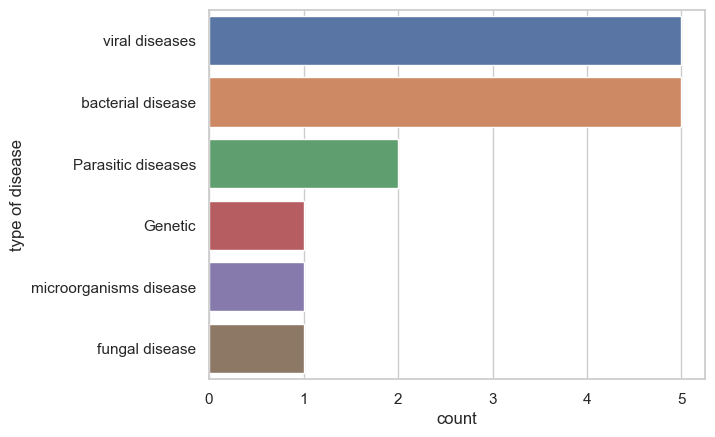

In [29]:
sns.countplot(y="type of disease", data=data)
plt.show()

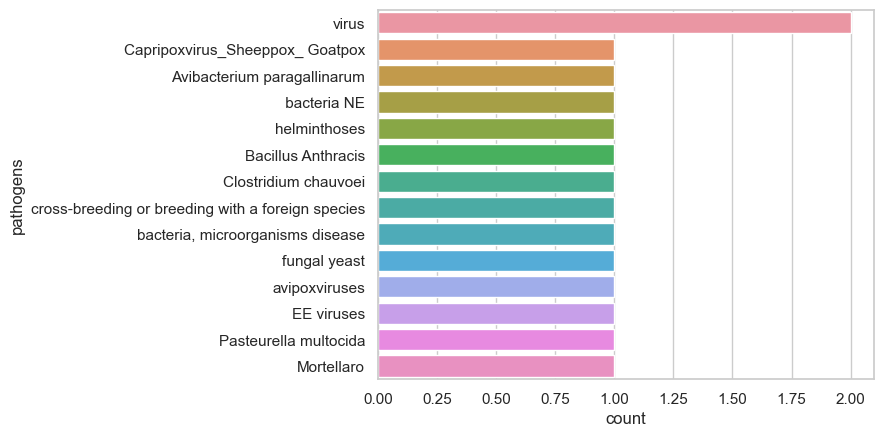

In [30]:
sns.countplot(y="pathogens", data=data)
plt.show()

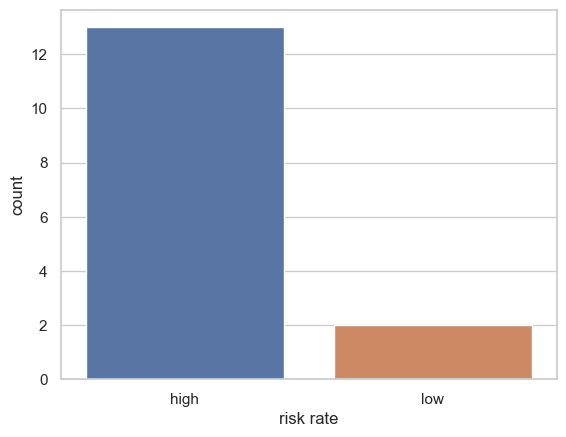

In [31]:
sns.countplot(x="risk rate", data=data)
plt.show()

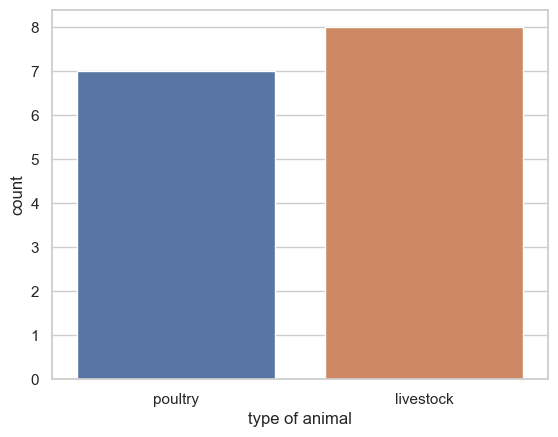

In [32]:
sns.countplot(x="type of animal", data=data)
plt.show()

In [33]:
data['total score'] = data['disease']+ data['pathogens']
data.head()

,Rank,Condition,id,disease,type of disease,type of animal,risk rate,symptoms,no.of symptoms,pathogens,prevention,treatment,appropriate medicines,no.of medicines,total score
0,1,animal_1,11S,Avian,viral diseases,poultry,high,Lack of Appetite_Swelled Eyes_Sneezing and Cou...,7,virus,Disinfect the place everytime_Reduce Wildlife ...,use antiviral compounds,antiviral compounds,1,Avianvirus
3,4,animal_4,44S,Lumpy skin,viral diseases,livestock,high,nodules around the head and neck and limbs _ma...,6,Capripoxvirus_Sheeppox_ Goatpox,vaccination_slaughter campaigns,Anti-Inflammatories,Non-Steroidal Anti-Inflammatories (NSAIDs)_ant...,2,Lumpy skin Capripoxvirus_Sheeppox_ Goatpox
6,7,animal_7,77S,Newcastle,viral diseases,poultry,high,Muscle tremors_Drooping wings_Twisted head_Cir...,8,virus,Parasite control_Vaccination_Identification & ...,Separate the Flock,organic treatment_garlic and onion_Oregano_Lem...,2,Newcastlevirus
7,8,animal_8,88S,Infectious Coryza,bacterial disease,poultry,high,swelling of the face_nasal and eye discharge_s...,3,Avibacterium paragallinarum,shot of vaccination,antibiotics,The antibiotics,1,Infectious CoryzaAvibacterium paragallinarum
8,9,animal_9,99S,Necrotic enteritis,bacterial disease,poultry,high,diarrhoea_increase in mortality,2,bacteria NE,Disinfect the place everytime_antibiotics,Isolate the infected animal,bacitracin_avilamycin,2,Necrotic enteritis bacteria NE


Text(0.5, 1.0, 'Covariance Plot')

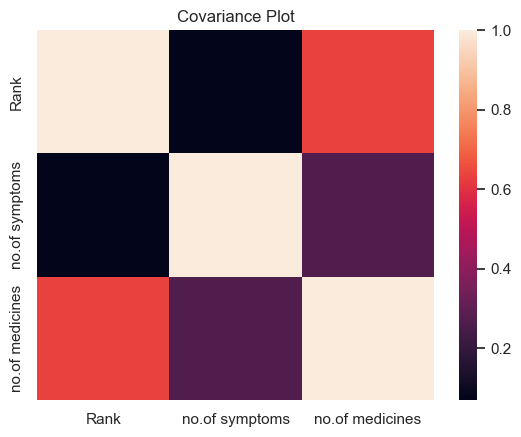

In [34]:
#to draw the Plot using Heatmaps
import seaborn as sns
sns.heatmap(data.corr())
plt.title('Covariance Plot')

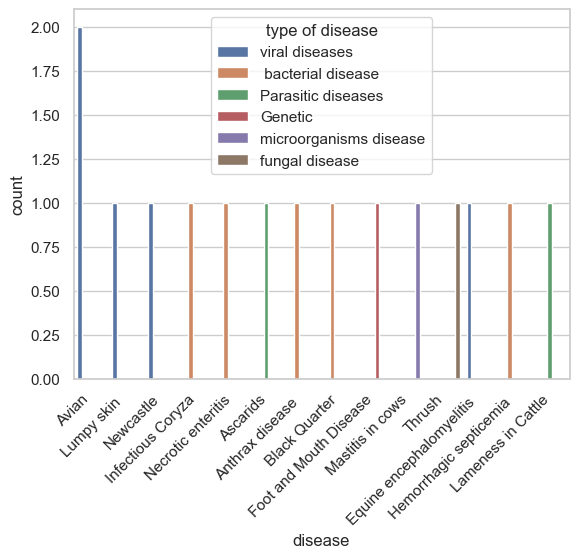

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data,x='disease',hue='type of disease')
plt.xticks(rotation=45, ha='right');

In [36]:
data

,Rank,Condition,id,disease,type of disease,type of animal,risk rate,symptoms,no.of symptoms,pathogens,prevention,treatment,appropriate medicines,no.of medicines,total score
0,1,animal_1,11S,Avian,viral diseases,poultry,high,Lack of Appetite_Swelled Eyes_Sneezing and Cou...,7,virus,Disinfect the place everytime_Reduce Wildlife ...,use antiviral compounds,antiviral compounds,1,Avianvirus
3,4,animal_4,44S,Lumpy skin,viral diseases,livestock,high,nodules around the head and neck and limbs _ma...,6,Capripoxvirus_Sheeppox_ Goatpox,vaccination_slaughter campaigns,Anti-Inflammatories,Non-Steroidal Anti-Inflammatories (NSAIDs)_ant...,2,Lumpy skin Capripoxvirus_Sheeppox_ Goatpox
6,7,animal_7,77S,Newcastle,viral diseases,poultry,high,Muscle tremors_Drooping wings_Twisted head_Cir...,8,virus,Parasite control_Vaccination_Identification & ...,Separate the Flock,organic treatment_garlic and onion_Oregano_Lem...,2,Newcastlevirus
7,8,animal_8,88S,Infectious Coryza,bacterial disease,poultry,high,swelling of the face_nasal and eye discharge_s...,3,Avibacterium paragallinarum,shot of vaccination,antibiotics,The antibiotics,1,Infectious CoryzaAvibacterium paragallinarum
8,9,animal_9,99S,Necrotic enteritis,bacterial disease,poultry,high,diarrhoea_increase in mortality,2,bacteria NE,Disinfect the place everytime_antibiotics,Isolate the infected animal,bacitracin_avilamycin,2,Necrotic enteritis bacteria NE
9,10,animal_10,00S,Ascarids,Parasitic diseases,poultry,high,Droopiness_Emaciation _Diarrhea,3,helminthoses,Sanitation Control_Separation between poultry,Antifungal Cream,Piperazine_Antifungal Cream_Wazine,3,Ascaridshelminthoses
10,11,animal_11,12S,Anthrax disease,bacterial disease,livestock,high,high temperature_shivering_breathing problems...,5,Bacillus Anthracis,shot of vaccination,antibiotics,penicillin_tetracycline_erythromycin_ciproflox...,4,Anthrax disease Bacillus Anthracis
11,12,animal_12,13S,Black Quarter,bacterial disease,livestock,high,fever_loss of hunger_uneasiness_anxiety_loss o...,11,Clostridium chauvoei,Avil injections,external application of disinfectants,antibiotics such as penicillin_tetracycline_an...,3,Black QuarterClostridium chauvoei
12,13,animal_13,14S,Foot and Mouth Disease,Genetic,livestock,high,fever_ blisters in the mouth_back_and the skin...,2,cross-breeding or breeding with a foreign species,avoid cross-breeding or breeding with a foreig...,antiseptic creams_dressings_coal tar_and coppe...,antiseptic creams_dressings_coal tar_and coppe...,4,Foot and Mouth Diseasecross-breeding or breedi...
13,14,animal_14,15S,Mastitis in cows,microorganisms disease,livestock,low,swelling and redness,2,"bacteria, microorganisms disease",Continuous cleansing of the area,antibiotics,giving the of antibiotics_antifungals,2,"Mastitis in cowsbacteria, microorganisms disease"
